# Machine Learning Course 1

by OrcaTech

## Jupter Notebook

The current environment is called a notebook and allows us to run our code in cells so that we can change individual parts of our data analysis while storing the previous values.

Common Shortcuts:
- a
    - insert cell above
- b
    - insert call below
- dd
    - deleted cell
- m
    - change to markdown
- y
    - change to code
- crtl+enter
    - run cell
- shift+enter
    - run cell and go to next cell

## Import Libraries

To keep our notebook neat, all the required libraries are usually imported at the start.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Problem Formulation

Machine learning or data analysis always tries to solve for a problem. This can usually be a classification problem such as object detection or a regression problem like predicting the price of stocks on the stock market.

In this course we take a simplified view of a real estate regression problem where we predict the price of a house. First we must analyse houses that were already sold and see how this relates to variables such as the date it was sold, its age, distance to the MRT, nearby convenience stores and location.

## Load the dataset

Many times the data will be given as CSV files (or any other format) and should be loaded into your environment.

In [2]:
df = pd.read_csv("RealEstate.csv", index_col=0)

## Data exploration

There are many ways to explore the data to see what we are dealing with.

In [3]:
# Show the first few rows only for easy viewing
df.head() 

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Get an idea of our data
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
# Get a random sample
df.sample()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
159,2013.0,11.6,390.5684,5,24.97937,121.54245,39.4


## Data Manipulation

A big part of machine learning is exploring the data and manipulating it into a form that makes sense for the model to use.

In [6]:
# Use ['column name'] to get this series
df['Y house price of unit area'].head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [7]:
# We can also get a few columns
df[['X2 house age','Y house price of unit area']].head()

,X2 house age,Y house price of unit area
No,,
1,32.0,37.9
2,19.5,42.2
3,13.3,47.3
4,13.3,54.8
5,5.0,43.1


In [8]:
# We can filter rows using this method as well
df[df['Y house price of unit area'] > 70]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
17,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1
106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


In [9]:
# The filter used actually helped us to create a mask
(df['Y house price of unit area'] > 45).head()

No
1    False
2    False
3     True
4     True
5    False
Name: Y house price of unit area, dtype: bool

In [10]:
# Pandas uses vectoriztion to manipulate data on series (or the whole column) instead of looping through rows

# Get the year by converting to integer
df['X7 transaction year'] = df['X1 transaction date'].astype(int)

# Here we try to get the month of each transaction from the date which seems to be in a weird form of years.
df['X8 transaction month'] = ((df['X1 transaction date'] - df['X7 transaction year']) * 12).round(0).astype(int)



df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X7 transaction year,X8 transaction month
No,,,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


In [11]:
# Always check that the data
sorted(df['X8 transaction month'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
# Realising that the months are not in the format we are used to we can add 1 to make it easier to understand
df['X8 transaction month'] = df['X8 transaction month'] + 1
sorted(df['X8 transaction month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
# There are many built in functions we can use like groupby, sum, mean, max, min
df.groupby(['X7 transaction year']).mean()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X8 transaction month
X7 transaction year,,,,,,,,
2012,2012.801024,16.866667,1052.404169,4.119048,24.968878,121.533056,36.304762,10.611111
2013,2013.301198,18.082639,1097.658854,4.083333,24.969097,121.533495,38.713194,4.614583


In [14]:
df.groupby(['X7 transaction year']).max()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X8 transaction month
X7 transaction year,,,,,,,,
2012,2012.917,40.9,6306.153,10,24.99176,121.56627,71.0,12
2013,2013.583,43.8,6488.021,10,25.01459,121.56627,117.5,8


## Data Visualization

We can use matplotlib or built-in pandas functions to build graphs to visualize our data for patterns. Another common library used is seaborn.

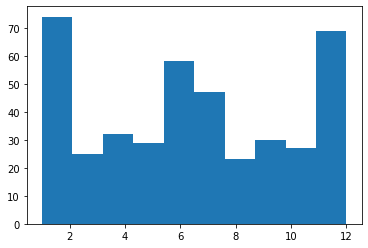

In [15]:
# Histogram
plt.hist(df['X8 transaction month'])
plt.show()

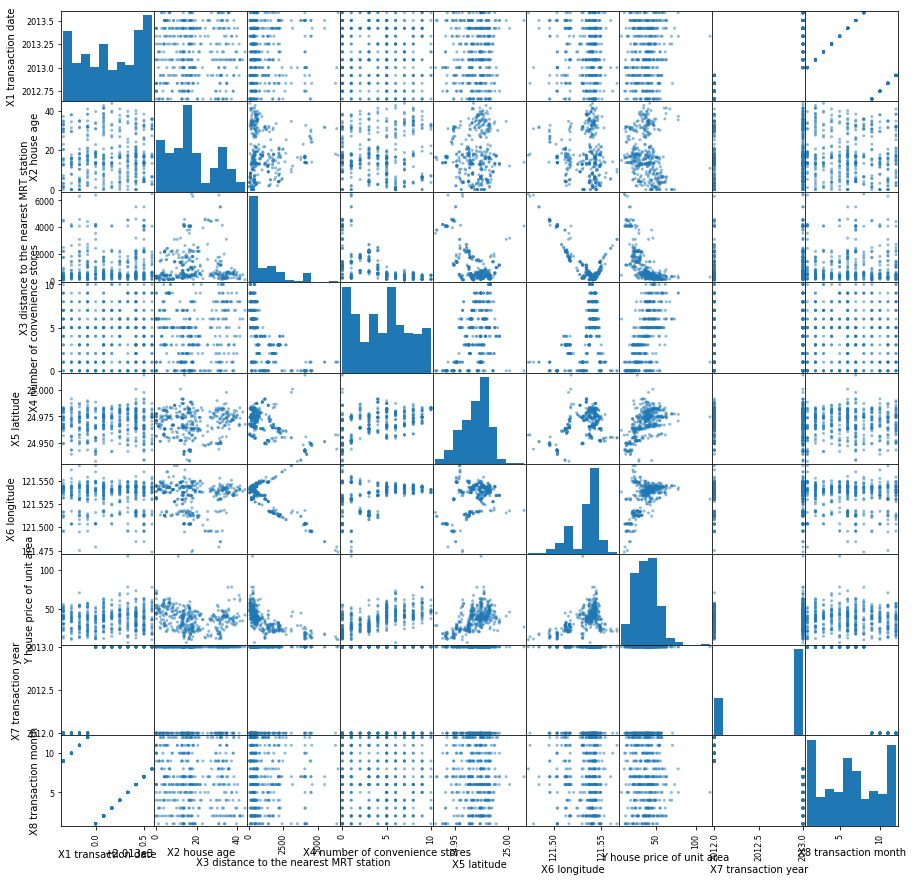

In [16]:
# Scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

## Removing columns

In [17]:
# We can easily remove the added columns with del
del df['X7 transaction year']
del df['X8 transaction month']
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Split to Dependent and Independent Variables

For a typical problem in Machine Learning, we will have something we need to predict given a set of other values. The something we want to predict is called a dependent variable, while the set of values given are the independent variables. In this case, Y house price of unit area is the dependent variable. Others are regarded as independent ones.

In [18]:
# Let us list the column names, so that we can easily select the dependent and independent variables
df.columns.values

array(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], dtype=object)

In [19]:
# Stores the label for the independent variable
y_label = ['Y house price of unit area']

In [20]:
# Stores the labels for the 'other' dependent variables
x_labels = ['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

In [21]:
# Now the data is still in a dataframe format
df[x_labels]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381
411,2012.667,5.6,90.45606,9,24.97433,121.54310
412,2013.250,18.8,390.96960,7,24.97923,121.53986


In [22]:
# Let us convert them into matrices
X = np.asarray(df[x_labels])
y = np.asarray(df[y_label])

## Normalize the Data
Normalizing is an important step in machine learning. Its function is to make the variables smaller in value. If the values we input to the machine learning model has a range that is too big, then it will not *converge*, or give a proper result. Here we will normalize all the dependent data.

In [23]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)

## Train and Test split
The data will be split into train and test because we need the data to train the model, but also spare some to test the model's validity and accuracy.

In [24]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [25]:
X_train

array([[1.        , 0.15068493, 0.0103754 , 0.9       , 0.51211827,
        0.75016174],
       [0.90938865, 0.0913242 , 0.32855561, 0.3       , 0.37469704,
        0.42387319],
       [0.81877729, 0.30136986, 0.26130607, 0.2       , 0.38839069,
        0.46549493],
       ...,
       [0.        , 0.84703196, 0.1384846 , 0.1       , 0.48364033,
        0.83135648],
       [0.09061135, 0.29452055, 0.03515249, 0.7       , 0.41190015,
        0.74875997],
       [0.54585153, 0.2739726 , 0.20677973, 0.1       , 0.24200194,
        0.80752642]])

In [26]:
y_train[0:5]

array([[58.1],
       [33.4],
       [30.8],
       [21.7],
       [20.9]])

## Multiple Linear Regression Model

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several (multiple) variables to predict the outcome of a (one) response variable. The `scikit-learn` library uses a linear regression algorithm called the OLS.

In [27]:
# Import the machine learning library Scikit-Learn
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [30]:
# Fit the model to the training data
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Linear regression coefficients
print(f"Regression coefficients [x1 x2 x3 x4 x5 x6]: {regr.coef_}")

Regression coefficients [x1 x2 x3 x4 x5 x6]: [[  5.19752289 -11.42703184 -29.83092874  10.82105149  19.13379372
   -1.8207899 ]]


In [32]:
# Use the model to predict the result
prediction = regr.predict(X_test)
print(prediction[0:5])
print(y_test[0:5])

[[34.6920798 ]
 [47.30118939]
 [21.92669234]
 [12.62287202]
 [42.69787196]]
[[27.3]
 [54.4]
 [22. ]
 [11.6]
 [45.4]]


In [33]:
# Compare the values to get the score
score = regr.score(X_test, y_test)
print("The accuracy of the prediction is", score)

The accuracy of the prediction is 0.7544596848431722


In [34]:
x_input = np.array([])
for x in x_labels:
    x_input = np.append(x_input, input(x + ": "))
    
x_input = x_input.reshape(1,-1)

x_input = scaler.transform(x_input)
print(x_input)

print("Your dream House price is", regr.predict(x_input))

X1 transaction date: 2012.0
X2 house age: 9.5
X3 distance to the nearest MRT station: 100
X4 number of convenience stores: 5
X5 latitude: 24.978
X6 longitude: 121.533
[[-0.72816594  0.21689498  0.01185173  0.5         0.55659234  0.64125512]]
Your dream House price is [[41.31890722]]


## SVM
This is another kind of a machine learning model. [Link to Wiki](https://en.wikipedia.org/wiki/Support_vector_machine#:~:text=In%20machine%20learning%2C%20support%2Dvector,for%20classification%20and%20regression%20analysis)

In [35]:
from sklearn import svm

regr = svm.SVR(gamma='scale', kernel='rbf')

In [36]:
regr.fit(X_train, y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

print(f"Regression coefficients [x1 x2 x3 x4 x5 x6]: {regr.coef_}")

In [37]:
# Use the model to predict the result
prediction = regr.predict(X_test)
print(prediction[0:5])
print(y_test[0:5])

[29.87875409 47.25816185 26.1199992  20.38545237 39.37594551]
[[27.3]
 [54.4]
 [22. ]
 [11.6]
 [45.4]]


In [38]:
# Compare the values to get the score
score = regr.score(X_test, y_test)
print("The accuracy of the prediction is", score)

The accuracy of the prediction is 0.8099065985687073


## Random Forest Regressor
This is also another kind of a learning model. [Link to wiki](https://en.wikipedia.org/wiki/Random_forest)

In [39]:
from sklearn import ensemble

regr = ensemble.RandomForestRegressor(n_estimators=100)

In [40]:
regr.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

print(f"Regression coefficients [x1 x2 x3 x4 x5 x6]: {regr.coef_}")

In [41]:
# Use the model to predict the result
prediction = regr.predict(X_test)
print(prediction[0:5])
print(y_test[0:5])

[25.0168     48.99675    23.794      13.799      58.20483333]
[[27.3]
 [54.4]
 [22. ]
 [11.6]
 [45.4]]


In [42]:
# Compare the values to get the score
score = regr.score(X_test, y_test)
print("The accuracy of the prediction is", score)

The accuracy of the prediction is 0.8050930840547277
